# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results
- BONUS: Perform all the plots in 3D instead of 2D

## 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

In [73]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
np.random.seed(1276)

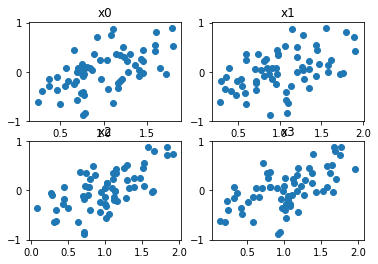

In [19]:
n = 64
x = np.linspace(0,1,n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

#plot 2 rows x 2 columns
plt.subplot(221)
plt.title('x0')
plt.scatter(x.T[0], y)
plt.subplot(222)
plt.title('x1')
plt.scatter(x.T[1], y)
plt.subplot(223)
plt.title('x2')
plt.scatter(x.T[2], y)
plt.subplot(224)
plt.title('x3')
plt.scatter(x.T[3], y)

## 2.  Create a model to fit the data. Hint: follow the example from Lesson 3

In [22]:
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)
beta = np.dot(left, right)
beta

array([ 0.23718255, -0.05323476,  0.33318659,  0.31219617, -0.81771724])

## 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

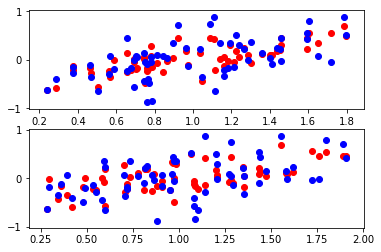

In [29]:
pred = np.dot(x, beta)

#layout graphs in 2 rows 1 column
plt.subplot(211)
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')

pred = np.dot(x, beta)
plt.subplot(212)
plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and create a model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [34]:
import pandas as pd
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [85]:
#Try different models
X1 = credit[['Income', 'Limit']].values
X1 = np.vstack([X1.T, np.ones(len(X1))]).T

X2 = credit[['Income', 'Limit','Balance','Age']].values
X2 = np.vstack([X2.T, np.ones(len(X2))]).T

X3 = credit[['Income', 'Limit','Balance','Age','Cards']].values
X3 = np.vstack([X3.T, np.ones(len(X3))]).T

X4 = credit[['Income', 'Limit','Balance','Age','Cards','Education']].values
X4 = np.vstack([X4.T, np.ones(len(X4))]).T

In [133]:
y = credit['Rating']
mse = []

#Model 1
left = np.linalg.inv(np.dot(X1.T, X1))
right = np.dot(y.T, X1)
beta = np.dot(left, right)
pred = np.dot(X1, beta)
pred1 = pred
print('Prediction 1:' + str(pred[0:4]))
mse.append(np.sum((y-pred)*(y-pred))/len(y))

#Model 2
left = np.linalg.inv(np.dot(X2.T, X2))
right = np.dot(y.T, X2)
beta = np.dot(left, right)
pred = np.dot(X2, beta)
pred2 = pred
print('Prediction 2:' + str(pred[0:4]))
mse.append(np.sum((y-pred)*(y-pred))/len(y))

#Model 3
left = np.linalg.inv(np.dot(X3.T, X3))
right = np.dot(y.T, X3)
beta = np.dot(left, right)
pred = np.dot(X3, beta)
pred3 = pred
print('Prediction 3:' + str(pred[0:4]))
mse.append(np.sum((y-pred)*(y-pred))/len(y))

#Model 4
left = np.linalg.inv(np.dot(X4.T, X4))
right = np.dot(y.T, X4)
beta = np.dot(left, right)
pred = np.dot(X4, beta)
pred4 = pred
print('Prediction 4:' + str(pred[0:4]))
mse.append(np.sum((y-pred)*(y-pred))/len(y))

print("\nMSE (1-4):" + str(mse))

Prediction 1:[279.11069209 483.31473117 511.91112757 674.5350458 ]
Prediction 2:[276.6968883  489.13120906 510.66703854 673.28205191]
Prediction 3:[273.30696358 486.87072998 516.39496756 674.80391529]
Prediction 4:[273.8922873  486.53358393 516.88616875 675.28737617]

MSE (1-4):[148.59075823670247, 142.38413288191347, 102.31822437945668, 101.80127575397154]


### 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can. 

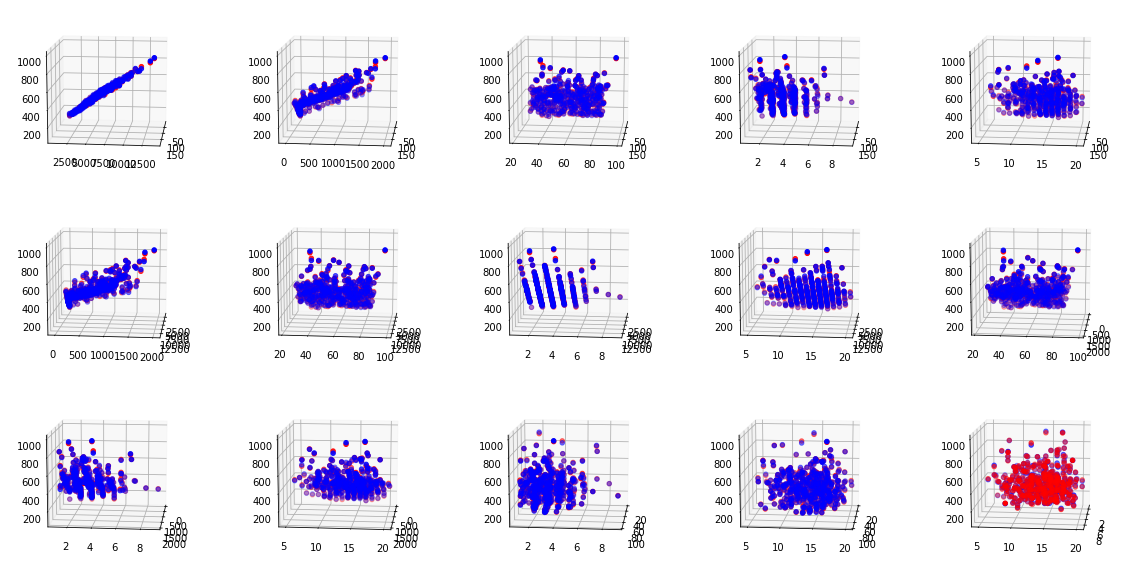

In [132]:
import itertools

#Model 4, with all numeric columns has lowest MSE
x=X4
pred = pred4

#get combinations of columns
header = ['Income', 'Limit','Balance','Age','Cards','Education']
cols = list(itertools.combinations(header, 2))
total = len(cols)
rows = total/5
fig = plt.figure(figsize=(20, 10))
for i, c in enumerate(cols):
    
    ax = fig.add_subplot(rows,5,i+1, projection='3d')
    ax.view_init(13, 6)
    c1 = header.index(c[0])
    c2 = header.index(c[1])
    ax.scatter(x.T[c1], x.T[c2], pred, zdir='z', c='r')
    ax.scatter(x.T[c1], x.T[c2], y, zdir='z', c='b')
    